# **菊安酱与菜菜的Python机器学习可视化**

## 第一期 关联图：03 带拟合线的散点图

### 扫码回复K进群，获取本课的ipy文件~！

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/%E4%BA%8C%E7%BB%B4%E7%A0%812.png" />

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

**注意：本篇中可能遇见无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接：https://www.jianshu.com/p/914b5f4ce6bf

In [1]:
import matplotlib

print(matplotlib.matplotlib_fname())

C:\Anaconda\lib\site-packages\matplotlib\mpl-data\matplotlibrc


<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 03/50 带最佳拟合线的散点图(the line of best fit)

最佳拟合线（或“趋势”线）是一条直线，它被认为是最能代表散点图上的数据的直线  
这条线线可以通过一些散点，不通过任何散点或通过所有散点  
**拟合线可以帮助我们找出并不太明显的趋势**

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/03%20%E6%8B%9F%E5%90%88%E7%BA%BF%E7%9A%84%E6%95%A3%E7%82%B9%E5%9B%BE2.PNG" align="center" />

横坐标：发动机排量(L)<br>
纵坐标：公路里程/加仑<br>
图例：汽缸数量

### 1. 导入需要的绘图库

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. 先来认识一下绘制最佳拟合线的函数

#### **sns.lmplot()**  
lmplot()是seaborn中最常用的函数之一，我们用它来帮助我们绘制出数据点的最佳拟合线。

In [3]:
X1 = np.linspace(0,10,50)

In [4]:
X1

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [10]:
X2 = [0]*10 + [1]*40 #重复10次0，重复40次1

In [5]:
y = 2*X1 + 5 + np.random.randn(50)*10

In [6]:
y

array([14.8165356 ,  8.88242024,  3.04991682, -2.72378266,  5.66292644,
       19.44719297,  8.95429237,  4.23761212,  9.25631149, 21.63644256,
       21.13346681,  5.28928737, 11.41405622, 14.10064213, 17.00442975,
        6.8009296 , 30.07013003, 20.34778455, 24.91777614, 15.91585652,
       22.75219726, -4.91368883,  7.64766736, 13.49890653, 20.9957199 ,
       12.66509588, -7.67857633, 32.30324863, 34.23725735, 20.46371606,
       21.64827274, 13.05923552, 13.22576349, 26.22564576, -5.71929108,
       23.19658369, 18.39123707, 17.73851683, 24.36726032, 29.8140469 ,
       15.89842571, 30.56330579, 28.38498157, 21.14583624, 23.60432762,
       22.94881333, 21.73781763, 32.58084306, 18.20084719, 21.02795073])

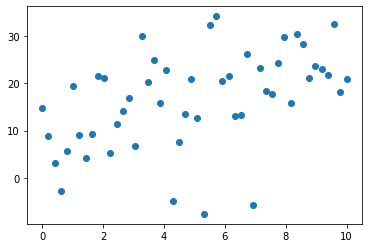

In [8]:
plt.scatter(X1,y);

In [11]:
data = pd.DataFrame({"X1":X1,"X2":X2,"y":y}) #把所有的数据放入我们的DataFrame

In [12]:
data

,X1,X2,y
0,0.000000,0,14.816536
1,0.204082,0,8.882420
2,0.408163,0,3.049917
3,0.612245,0,-2.723783
4,0.816327,0,5.662926
5,1.020408,0,19.447193
6,1.224490,0,8.954292
7,1.428571,0,4.237612
8,1.632653,0,9.256311
9,1.836735,0,21.636443


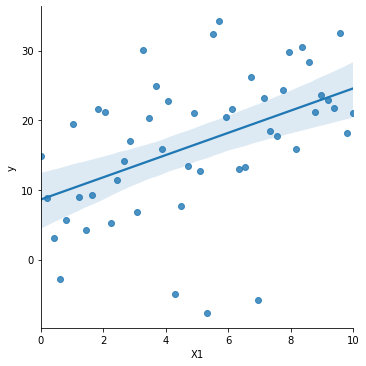

In [14]:
gridobj = sns.lmplot(x="X1",y="y",data=data) #必须通过data + 字符串的方式来读取数据

事实上，sns.lmplot()功能复杂，参数丰富（39个），我们可以通过它创造一个在数据集的不同子集上拟合回归模型的便捷界面，对于有众多分类特征的回归类数据非常有效。

In [48]:
#比如说，如果我们要将点分类？

In [52]:
plt.rcParams['font.sans-serif'] = ['simsun'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] =  False #用来正常显示负号

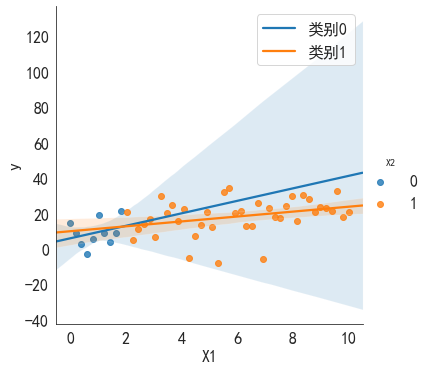

In [53]:
plt.rcParams['font.sans-serif']=['Simhei']
data = pd.DataFrame({"X1":X1,"X2":X2,"y":y})
gridobj = sns.lmplot(x="X1",y="y",data=data
                    ,hue = "X2"
#                   ,legend=False
                    ,truncate=False #延长拟合线的范围
                    )
plt.legend(["类别0","类别1"])

> **重要参数**  
>> x ,y ,data：横坐标，纵坐标，数据  
>> hue：取出数据集的子集，对数据集进行分类  
>> legend：是否显示图例<br>

更多参数请见：https://seaborn.pydata.org/generated/seaborn.lmplot.html

### 3. 认识数据

In [19]:
df = pd.read_csv("D:\python数据处理——数据\橘安酱和菜菜的可视化全集\data\mpg_ggplot2.csv")

In [20]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [22]:
df.shape

(234, 11)

In [21]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [23]:
df.columns.values

array(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv',
       'cty', 'hwy', 'fl', 'class'], dtype=object)

In [24]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
              ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆种类"]

#驱动类型：四轮，前轮，后轮
#能源种类：汽油，柴油，用电等等
#车辆种类：皮卡，SUV，小型，中型等等
#城市里程/加仑，公路里程/加仑：表示使用没加仑汽油能够跑的英里数，所以这个数值越大代表汽车越节能

In [25]:
[*zip(df.columns.values,np.array(name))]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆种类')]

### 4. 绘制图像

In [27]:
df.cyl

0      4
1      4
2      4
3      4
4      6
      ..
229    4
230    4
231    6
232    6
233    6
Name: cyl, Length: 234, dtype: int64

In [28]:
df.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

In [29]:
df.cyl.isin([4,8])

0       True
1       True
2       True
3       True
4      False
       ...  
229     True
230     True
231    False
232    False
233    False
Name: cyl, Length: 234, dtype: bool

In [30]:
df.loc[df.cyl.isin([4,8]),:].head()
#函数isin的用法：a.isin(x)，表示判断x是否在序列a中存在，若存在则返回True，若不存在则返回False

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact


In [31]:
df.loc[df.cyl.isin([4,8]),:].shape

(151, 11)

In [50]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

> **重要参数**  
>> height：图像的高度  
>> aspect：图像的纵横比，aspect * height = 每张图的长度  
>> palette：类似于matplotlib中的colormap，表示使用什么色板/光谱

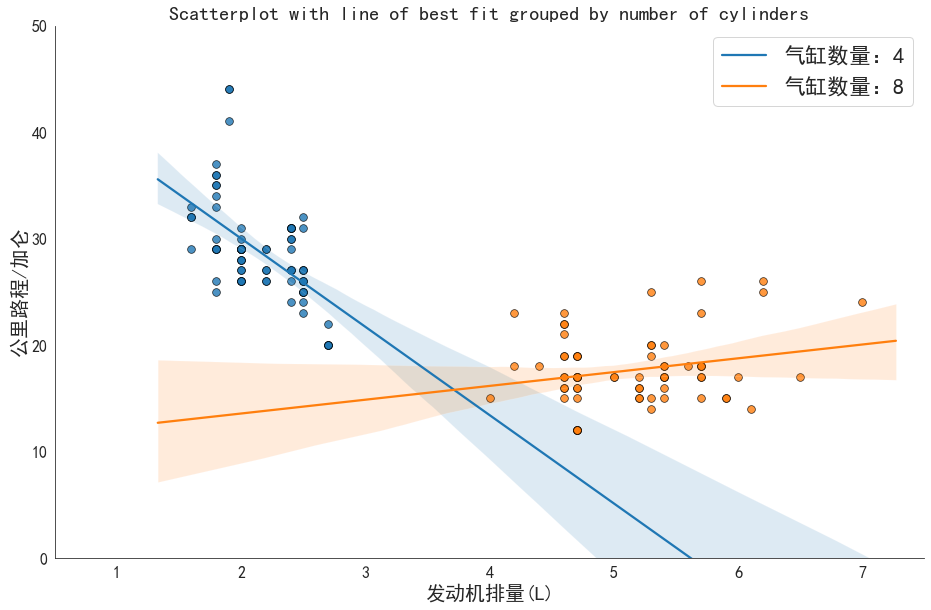

In [54]:
#准备数据
df_select = df.loc[df.cyl.isin([4,8]), :]

#绘制图像
sns.set_style("white") #设立风格

gridobj = sns.lmplot(x="displ" #横坐标：发动机排量
                     , y="hwy" #纵坐标：公路里程/加仑
                     , hue="cyl" #分类/子集，汽缸数量
                     , data=df_select #能够输入的数据
                     , height=8 #图像的高度（纵向，也叫做宽度）
                     , aspect=1.6 #图像的纵横比，因此 aspect*height = 每个图像的长度（横向），单位为英寸
                     , palette='tab10' #色板，tab10
                     , legend = False #不显示图例
                     , scatter_kws=dict(s=60, linewidths=.7, edgecolors='black') #其他参数
                     , truncate=False #延长拟合线的范围
                    )

#装饰图像
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
plt.xlabel("发动机排量(L)",fontsize=20)
plt.ylabel("公里路程/加仑",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(["气缸数量：4","气缸数量：8"], fontsize=22)
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

### 5. 让每个类型的散点显示在不同的图像上

> **重要参数**
>> col：表示按照这个特征中的分类绘制图像，并且一个类别绘制一张图一条拟合线，排成一行  
>> col_wrap：当参数col有效的时候有效，表示每行最多显示col_wrap个图

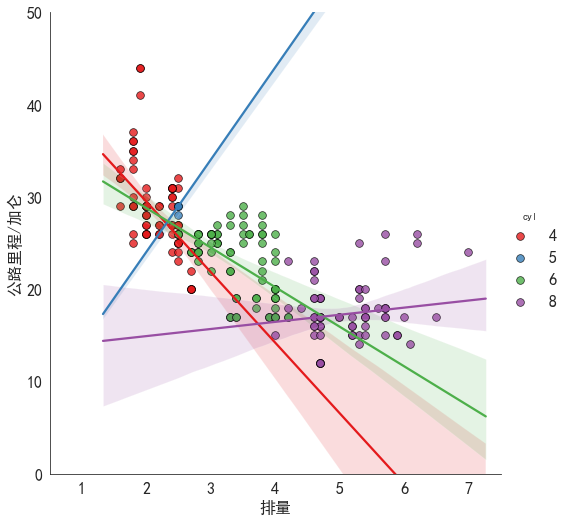

In [55]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': med, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性

#一图四线
gridobj = sns.lmplot(x="displ", y="hwy", 
                     #data=df_select, 
                     data=df,
                     hue = "cyl",
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     #col="cyl", #表示按照这个特征中的分类绘制图像，并且一个类别使用一张图，一条直线
                     #col_wrap = 3, #表示对col中的类别数量进行折叠，让一行变成多行
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black')
                     ,truncate=False #延长拟合线的范围
                    )

#装饰图像
plt.rcParams['font.sans-serif']=['Simhei']
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50),xlabel="排量",ylabel="公路里程/加仑")
plt.show()

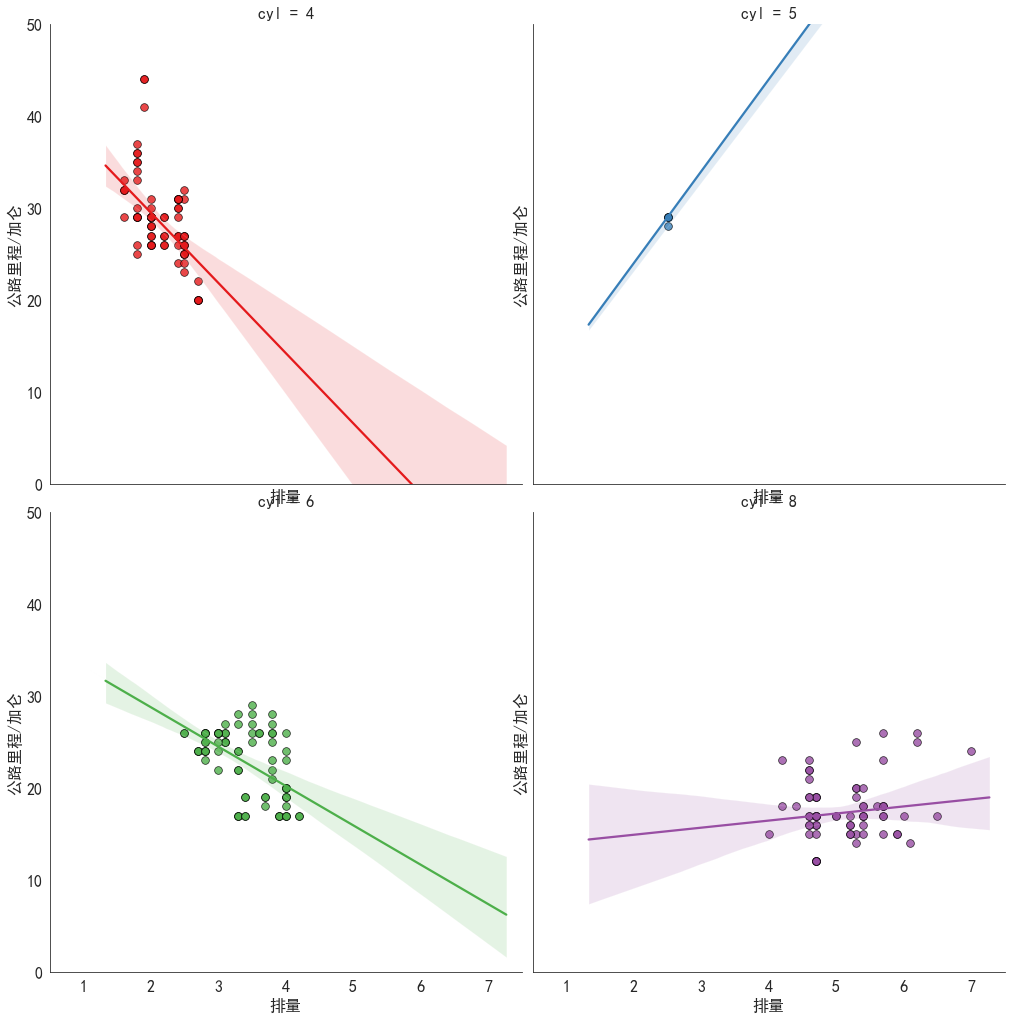

In [56]:
#四图四线
gridobj = sns.lmplot(x="displ", y="hwy", 
                     #data=df_select, 
                     data=df,
                     hue = "cyl",
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="cyl", #表示按照这个特征中的分类绘制图像，并且一个类别使用一张图，一条直线
                     col_wrap = 2, #表示对col中的类别数量进行折叠，让一行变成多行
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black')
                     ,truncate=False #延长拟合线的范围
                    )

#装饰图像
plt.rcParams['font.sans-serif']=['Simhei']
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50),xlabel="排量",ylabel="公路里程/加仑")
plt.show()

### 6. 可以从图像解读出什么信息？

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 04 & 05/50 抖动的带状图与计数图

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/04%2B05.PNG" align="center" />

In [57]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
# Import Data
df = pd.read_csv("D:\python数据处理——数据\橘安酱和菜菜的可视化全集\data\mpg_ggplot2.csv")

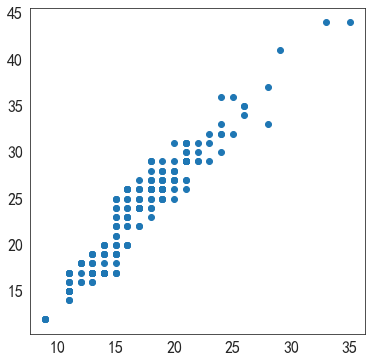

In [59]:
plt.figure(figsize=(6,6))
plt.scatter(df.cty,df.hwy);

In [60]:
#你是否有发现，图像上的数据点看起来似乎有点少？

In [61]:
df.shape

(234, 11)

In [62]:
df.loc[:,["cty","hwy"]] #发现了么？有很多横纵坐标一致的点~

,cty,hwy
0,18,29
1,21,29
2,20,31
3,21,30
4,16,26
...,...,...
229,19,28
230,21,29
231,16,26
232,18,26


有两种手段可以解决这个问题，抖动图与计数图，两种都使用我们的类stripplot来进行绘制

#### sns.stripplot()  
>重要参数  
>> jitter：抖动的幅度（即同一位置的两个点的距离大小），0表示完全不存在抖动

#### 抖动图

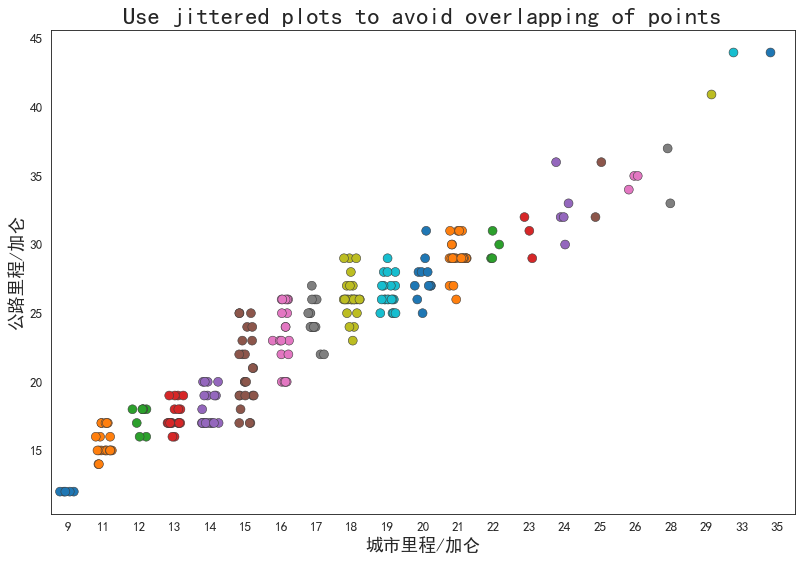

In [90]:
#建立画布
fig, ax = plt.subplots(figsize=(12,8), dpi = 80)

#用来画抖动图的函数：sns.stripplot
sns.stripplot(x=df.cty, y=df.hwy
              , jitter=0.25 #抖动的幅度
              , size=8, ax=ax
              , linewidth=.5
              , palette='tab10' #选择绘图的色谱
             )

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.rcParams['font.sans-serif']=['Simhei']
plt.xlabel("城市里程/加仑",fontsize=16)
plt.ylabel("公路里程/加仑",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 计数图

In [73]:
#处理数据
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name="counts") #name参数：用于原始Series里面本来是value的那些值的列名

In [69]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [71]:
df.groupby(['hwy', 'cty']).size() #以hwy和cty为主键，取出来的所有类别，size是聚合函数

hwy  cty
12   9       5
14   11      2
15   11     10
16   11      3
     12      2
            ..
36   25      1
37   28      1
41   29      1
44   33      1
     35      1
Length: 78, dtype: int64

In [72]:
#size与count有什么不同？
df.groupby(['hwy', 'cty']).count()

manufacturer  model  displ  year  cyl  trans  drv  fl  class
hwy cty                                                              
12  9               5      5      5     5    5      5    5   5      5
14  11              2      2      2     2    2      2    2   2      2
15  11             10     10     10    10   10     10   10  10     10
16  11              3      3      3     3    3      3    3   3      3
    12              2      2      2     2    2      2    2   2      2
...               ...    ...    ...   ...  ...    ...  ...  ..    ...
36  25              1      1      1     1    1      1    1   1      1
37  28              1      1      1     1    1      1    1   1      1
41  29              1      1      1     1    1      1    1   1      1
44  33              1      1      1     1    1      1    1   1      1
    35              1      1      1     1    1      1    1   1      1

[78 rows x 9 columns]

In [84]:
df_counts

,hwy,cty,counts
0,12,9,5
1,14,11,2
2,15,11,10
3,16,11,3
4,16,12,2
...,...,...,...
73,36,25,1
74,37,28,1
75,41,29,1
76,44,33,1


ValueError: s must be a scalar, or the same size as x and y

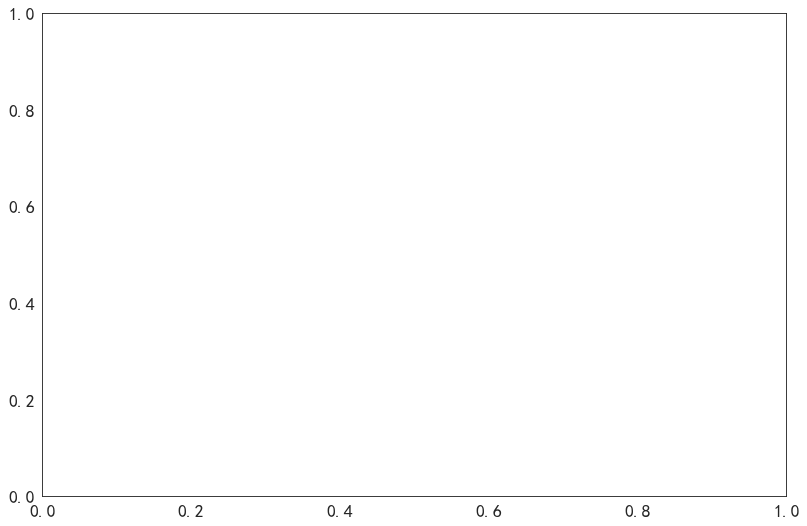

In [116]:
#画计数图
fig, ax = plt.subplots(figsize=(12,8), dpi= 80)    
sns.stripplot(x=df_counts.cty #横坐标
              , y=df_counts.hwy #纵坐标
              , data=df_counts
              , size=df_counts.counts*2 #尺寸 #这一步报错
              , ax=ax
             # , palette='tab10'
             )

#装饰
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=18)
plt.rcParams['font.sans-serif']=['Simhei']
plt.xlabel("城市里程/加仑",fontsize=16)
plt.ylabel("公路里程/加仑",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

seaborn.stripplot()数据点的size不能单独控制。无论是size还是s参数传进去都一样，比如你上面的例子中，size的只能是1个（所有点大小都一样）或者4个（每个分类x1有4个点）。

In [ ]:
#气缸数量与公路里程/加仑(油耗)是什么关系？气缸数量越多，汽车没加仑油可以跑的公路里程就越长，所以气缸越多的车越省油